Imports

In [67]:
import pandas as pd
import numpy as np

In [50]:
df = pd.read_csv('../../data/feature_store/new_features.csv')

In [51]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   age                 5000 non-null   int64  
 1   experience          5000 non-null   int64  
 2   income              5000 non-null   int64  
 3   zip_code            5000 non-null   int64  
 4   family              5000 non-null   int64  
 5   cc_avg              5000 non-null   float64
 6   education           5000 non-null   int64  
 7   mortgage            5000 non-null   int64  
 8   personal_loan       5000 non-null   int64  
 9   securities_account  5000 non-null   int64  
 10  cd_account          5000 non-null   int64  
 11  online              5000 non-null   int64  
 12  credit_card         5000 non-null   int64  
 13  age_bracket         5000 non-null   int64  
 14  age_bracket_name    5000 non-null   object 
dtypes: float64(1), int64(13), object(1)
memory usage: 586.1

In [52]:
# columns

features = df.columns.tolist()

In [62]:
#  Renda per capita por membro da familia (média)
'''
pode ajudar a entender a capacidade de pagamento
de despesas per capita.
'''

df['income_per_family_member'] = df['income'] / (df['family'] + 1)

# Despesas com cartão de crédito em relação a renda

'''
captura o quanto o individuo gasta com cartão de crédito em relação
ao total de sua renda. Pode ser uma indicação de risco caso essa 
taxa seja alta.
'''

df['cc_to_income_ratio'] = df['cc_avg'] / df['income']

# Indice de comprometimento de renda com dividas

'''
fornece uma ideia da relação entre a dívida e a renda total
para medir a capacidade de tomar um novo crédito.
'''

df['debt_to_income_ratio'] = (df['cc_avg'] + df['mortgage']) / df['income']


# Nível de maturidade financeira

'''

'''

df['financial_maturity_index'] = (df['income'] / df['cc_avg'])

In [63]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 19 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       5000 non-null   int64  
 1   experience                5000 non-null   int64  
 2   income                    5000 non-null   int64  
 3   zip_code                  5000 non-null   int64  
 4   family                    5000 non-null   int64  
 5   cc_avg                    5000 non-null   float64
 6   education                 5000 non-null   int64  
 7   mortgage                  5000 non-null   int64  
 8   personal_loan             5000 non-null   int64  
 9   securities_account        5000 non-null   int64  
 10  cd_account                5000 non-null   int64  
 11  online                    5000 non-null   int64  
 12  credit_card               5000 non-null   int64  
 13  age_bracket               5000 non-null   int64  
 14  age_brac

<Axes: ylabel='Frequency'>

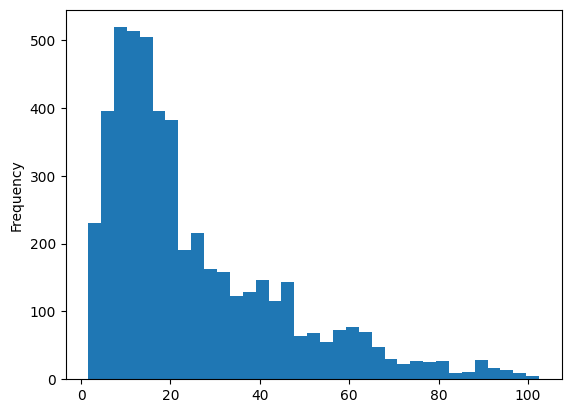

In [64]:
df['income_per_family_member'].plot(kind='hist', bins=35)

<Axes: ylabel='Frequency'>

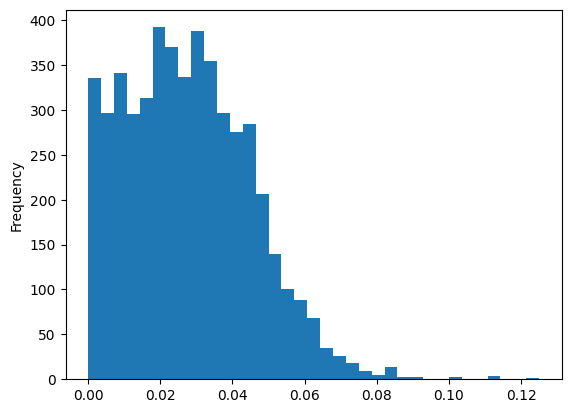

In [65]:
df['cc_to_income_ratio'].plot(kind='hist', bins=35)

In [68]:
# Identificando valores tendendo ao infinito...

infinite_values = df[df['financial_maturity_index'].isin([np.inf, -np.inf])]

,age,experience,income,zip_code,family,cc_avg,education,mortgage,personal_loan,securities_account,cd_account,online,credit_card,age_bracket,age_bracket_name,income_per_family_member,cc_to_income_ratio,debt_to_income_ratio,financial_maturity_index
63,42,17,32,94523,4,0.0,2,0,0,0,0,1,0,2,Millennials,6.400000,0.0,0.000000,inf
128,38,14,74,92182,2,0.0,1,0,0,1,0,1,0,2,Millennials,24.666667,0.0,0.000000,inf
198,27,3,59,94123,4,0.0,1,90,0,1,0,1,0,2,Millennials,11.800000,0.0,1.525424,inf
210,51,26,20,92131,2,0.0,1,0,0,0,0,0,0,3,Generation X,6.666667,0.0,0.000000,inf
215,38,14,92,95818,2,0.0,1,249,0,0,0,1,1,2,Millennials,30.666667,0.0,2.706522,inf
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4801,34,10,88,94404,2,0.0,1,121,0,0,0,1,0,2,Millennials,29.333333,0.0,1.375000,inf
4826,56,31,81,93943,2,0.0,3,225,0,0,0,0,0,3,Generation X,27.000000,0.0,2.777778,inf
4837,36,10,183,95348,2,0.0,1,0,0,0,0,0,0,2,Millennials,61.000000,0.0,0.000000,inf
4910,48,22,120,90291,1,0.0,1,0,0,0,0,1,0,3,Generation X,60.000000,0.0,0.000000,inf


In [69]:
# Tratando valores que podem estar tendendo ao infinito

df.replace([np.inf, -np.inf], np.nan, inplace=True)
df.dropna(inplace=True)

In [73]:
df['financial_maturity_index']

0        30.625000
1        22.666667
2        11.000000
3        37.037037
4        45.000000
           ...    
4995     21.052632
4996     37.500000
4997     80.000000
4998     98.000000
4999    103.750000
Name: financial_maturity_index, Length: 4894, dtype: float64

<Axes: ylabel='Frequency'>

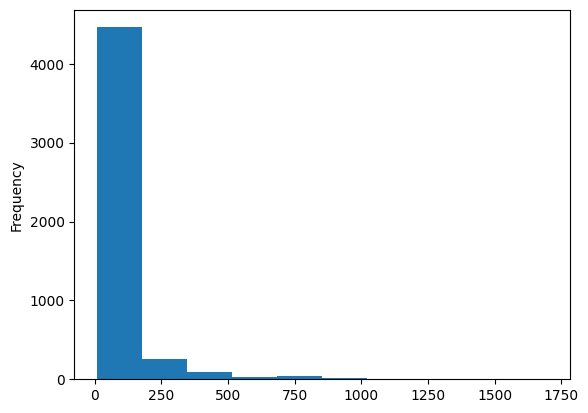

In [70]:
df['financial_maturity_index'].plot(kind='hist')

In [72]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4894 entries, 0 to 4999
Data columns (total 19 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       4894 non-null   int64  
 1   experience                4894 non-null   int64  
 2   income                    4894 non-null   int64  
 3   zip_code                  4894 non-null   int64  
 4   family                    4894 non-null   int64  
 5   cc_avg                    4894 non-null   float64
 6   education                 4894 non-null   int64  
 7   mortgage                  4894 non-null   int64  
 8   personal_loan             4894 non-null   int64  
 9   securities_account        4894 non-null   int64  
 10  cd_account                4894 non-null   int64  
 11  online                    4894 non-null   int64  
 12  credit_card               4894 non-null   int64  
 13  age_bracket               4894 non-null   int64  
 14  age_bracket_n

In [74]:
df.to_csv('../../data/feature_store/new_features.csv', index=False)